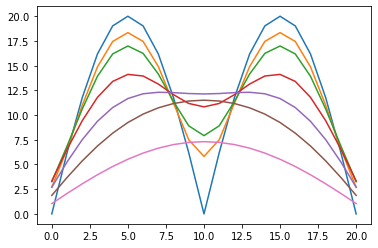

In [1]:
import math
import matplotlib.pylab as plt
import numpy as np
#partial differential equation

def pde(l_x,l_t,N_x,N_t):
    h_x = (l_x/N_x)
    h_t = (l_t/N_t)
    V0 = []
    X = []
    for i in range(0,N_x+1):
        # print(i)
        V0.append(20*abs(math.sin(math.pi*h_x*i)))
        X.append(i)
    # print(V0)
    # print(0)
    plt.plot(X, V0)
    alpha  = (h_t/(h_x**2))
    # print(alpha)
    V1 = np.zeros(N_x+1)
   
    for j in range(0,1000):
        for i in range(0,N_x+1):
            if i == 0:
                V1[i] = (1-2*alpha)*V0[i] + alpha*V0[i+1]
            elif i == N_x:
                V1[i] = alpha*V0[i-1] + (1-2*alpha)*V0[i]
            else:
                V1[i] = alpha*V0[i-1] + (1-2*alpha)*V0[i] + alpha*V0[i+1]
        V0 = list(V1)
        if j==10 or j==20 or j==50 or j==100 or j==200 or j==500 or j==1000:
            plt.plot(X, V0)
    plt.show()

pde(2,4,20,5000)



0.24999999999999994


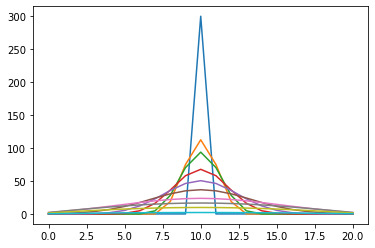

In [172]:
import matplotlib.pylab as plt

def vnot(l_x, N_x): 
    V0 = []
    X = []
    h_x = (l_x/N_x)
    for i in range(0,N_x+1):
        # print(i)
        if h_x*i == 1:
            V0.append(300)
        else:
            V0.append(0)
        X.append(i)
    # print(V0)
    # print(0)
    plt.plot(X, V0)
    return X, V0
def pde(l_x,l_t,N_x,N_t):
    
    h_x = (l_x/N_x)
    h_t = (l_t/N_t)
    X, V0 = vnot(l_x, N_x)
    alpha  = (h_t/(h_x**2))
    print(alpha)
    V1 = np.zeros(N_x+1)
   
    for j in range(0,1000):
        for i in range(0,N_x+1):
            if i == 0:
                V1[i] = (1-2*alpha)*V0[i] + alpha*V0[i+1]
            elif i == N_x:
                V1[i] = alpha*V0[i-1] + (1-2*alpha)*V0[i]
            else:
                V1[i] = alpha*V0[i-1] + (1-2*alpha)*V0[i] + alpha*V0[i+1]
        V0 = list(V1)
        if j==1 or j==2 or j==5 or j==10 or j==20 or j==50 or j==100 or j==200 or j==500 or j==1000:
            plt.plot(X, V0)
    plt.show()
    



pde(2,20,20,8000)
#pde(2,20,4,8000)


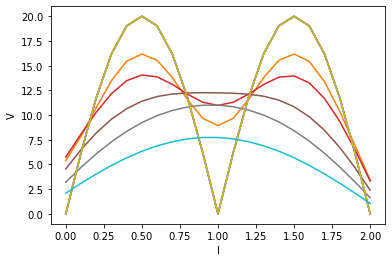

In [26]:
import matplotlib.pyplot as plt
import math

def ux0(x):
    y = math.pi*x
    return 20*abs(math.sin(y))

def ExpPDE(ux0, lx, lt, nx, nt, nt1):
    ht = lt/nt
    hx = lx/nx
    #alpha = ht/(hx**2)
    alpha=0.2
   
    #print(ht,hx,alpha)
   
    Vt = [0]*(nx+1)
    V0 = [0]*(nx+1)
    V00 = [0]*(nx+1)
    LX = [0]*(nx+1)
   
    x1=0
   
    for i in range(0,nx+1):
        x1 = i*hx
        #print('x',x1)
        LX[i] = x1
        V0[i] = ux0(x1)
   
    #print(len(V0))
    for i in range(len(V0)):
        Vt[i] = V0[i]
        V00[i] = V0[i]
   
    for j in range(0,nt1):
        #print(j)
        for i in range(0,nx+1):
       
            if i == 0:
                Vt[i] = ((1-(2*alpha))*V00[i]) + (alpha*V00[i+1])
                #print('a',i,j)
           
            if i == nx:
                Vt[i] = ((1-(2*alpha))*V00[i]) + (alpha*V00[i-1])
                #print('b',Vt[i])
           
            else:
                Vt[i] = ((1-(2*alpha))*V00[i]) + (alpha*V00[i+1]) + (alpha*V00[i-1])
                #print('c',Vt[i])
       
        for i in range(len(V0)):
            V00[i] = Vt[i]
        if j==10 or j==20 or j==50 or j==100 or j==200 or j==500 or j==1000:
            plt.plot(LX,V0,label='Time Step = 0')
            plt.plot(LX,Vt,label='Time Step Specified')
    # Label for x-axis
    plt.xlabel("l")
    # Label for y-axis
    plt.ylabel("V")
    #plt.legend()
    plt.show()
   
    return Vt, LX, V0

T1,L1,T0 = ExpPDE(ux0, 2, 4, 20, 5000,500)
#T1,L1,T0 = ExpPDE(ux0, 2, 4, 20, 5000, 100)

alpha = 0.03125



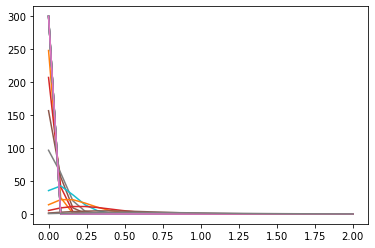

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

#import toolsar as ar
import math

def ux0(x,s):
    sig = 300
    val = np.zeros_like(x)
    val[(-(1/(2*sig))<=x) & (x<=(1/(2*sig)))] = sig
    return val
    

def ExpPDE(ux0, lx, lt, nx, nt, nt1):
    ht = lt/nt
    hx = lx/nx
    alpha = ht/(hx**2)
    #alpha=0.2
    print('alpha =',alpha)
    print()
    if alpha > 0.5:
        print('Unstable!')
    #print(ht,hx,alpha)
    if alpha <= 0.5:
        Vt = [0]*(nx+1)
        V0 = [0]*(nx+1)
        V00 = [0]*(nx+1)
        LX = [0]*(nx+1)
   
        x1=0

        for i in range(0,nx+1):
            x1 = i*hx
            #print('x',x1)
            LX[i] = x1
            V0[i] = ux0(x1,i)

        #print(len(V0))
        for i in range(len(V0)):
            Vt[i] = V0[i]
            V00[i] = V0[i]

        for j in range(0,nt1):
            #print(j)
            for i in range(0,nx+1):

                if i == 0:
                    Vt[i] = ((1-(2*alpha))*V00[i]) + (alpha*V00[i+1])
                    #print('a',i,j)

                if i == nx:
                    Vt[i] = ((1-(2*alpha))*V00[i]) + (alpha*V00[i-1])
                    #print('b',Vt[i])

                else:
                    Vt[i] = ((1-(2*alpha))*V00[i]) + (alpha*V00[i+1]) + (alpha*V00[i-1])
                    #print('c',Vt[i])

            for i in range(len(V0)):
                V00[i] = Vt[i]
            if j==2 or j==5 or j==10  or j==20 or j==50 or j==100 or j==200 or j==500 or j==1000:
                
                plt.plot(LX,V0)
                plt.plot(LX,Vt)
        
        plt.show()

        return Vt, LX, V0
lx = 2 #length of rod
lt = 100 #time to observe
nx = 25 #no of length intervals
nt = 500000 #no of time intervals
# at time stamp = 2, 5, 10, 20, 50, 100, 200, 500, 1000:
T1,L1,T0 = ExpPDE(ux0, lx, lt, nx, nt, 5000)

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import math

#For M is number of grid points for space interval and N is number of grid points for time interval

def Vnot(x0, xL, M):
    V0 = []
    V1 = []
    xs = np.linspace(x0, xL, M)
    for i in range(0,M):
        v = 20*abs(math.sin(pi*xs[i]))
        V0.append(v)
        V1.append(v)
    return V0,V1,xs


def pde( V0, V1, x0, t0, xL, tF, M, N):
    #x0: Lower boundary value of x; xL: Upper boundary value of x
    ht = (tF - t0) / (N - 1)
    hx = (xL - x0) / (M - 1)
    a =  ht / (hx*hx)
    if (a>0.5):
        print("Instability condition breached!")
# Create grid
    #ts = np.linspace(t0, tF, N)
    xs = np.linspace(x0, xL, M)
    
# Discretised derivative formula
    for j in range(1, N):
        
        for i in range(0, M-1):
            if(i==0):
                V1[i] =  (1 - (2 * a)) * V0[i] + a*V0[i+1]
            elif (i==M):
                V1[i] =  (a * V0[i-1]) + (1 - (2 * a)) * V0[i]
            else :               
                V1[i] = (a * V0[i-1]) + ((1 - (2 * a)) * V0[i]) +( a * V0[i+1])
# Boundary conditions
        for i in range(0,M-1):
            V0[i] = V1[i] 
        
    return V0, xs



SyntaxError: invalid syntax (<ipython-input-68-fae768a4fc1c>, line 41)

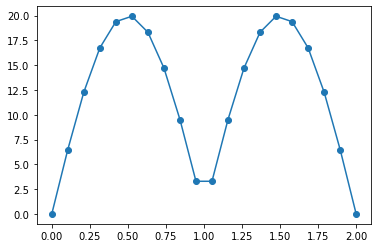

TypeError: cannot unpack non-iterable NoneType object

In [69]:

pi = 3.141593
M = 20 # number of grid points for space interval
N = 5000 # ''     '' ''   ''     ''  time ''
x0 = 0
xL = 2 
t0 = 0
tF = 4

v0,v1,xs = Vnot(x0, xL, M)
plt.plot(xs,V,'o-')
plt.show()

V0, X = pde( v0,v1, x0, t0, xL, tF, M, N)

#T,X = np.meshgrid(V0, xs1)

plt.plot(X,V0)
plt.show()



In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nx = 20
hx = (2-0) / nx
nt = 5000
ht = (4-0) / nt
a = ht/(hx**2)
# Get A
A = np.zeros((nx+1, nt+1))
#A[0, 0] = 1
#A[nx+1, nt+1] = 1
for i in range(0, nx):
    for j in range (0,nt):
        A[i, j-1] = a
        A[i, j] = 1-2*a
        A[i, j+1] = a

print(A)

# Get b
b = np.zeros(n+1)
b[1:-1] = 20
b[-1] = 50
print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

t = np.linspace(0, 5, 11)

plt.figure(figsize=(10,8))
plt.plot(t, y)
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()

[[0.08 0.08 0.08 ... 0.08 0.84 0.08]
 [0.08 0.08 0.08 ... 0.08 0.84 0.08]
 [0.08 0.08 0.08 ... 0.08 0.84 0.08]
 ...
 [0.08 0.08 0.08 ... 0.08 0.84 0.08]
 [0.08 0.08 0.08 ... 0.08 0.84 0.08]
 [0.   0.   0.   ... 0.   0.   0.  ]]
[ 0.   -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 50.  ]


LinAlgError: Last 2 dimensions of the array must be square